<a href="https://colab.research.google.com/github/yeesem2002/Machine-Learning-Project/blob/main/Housing%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House Pricing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Data Cleaning and Transformation**

In [ ]:
#Copy dataset from df to df2
df2 = df.copy()
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#Convert the value of yes - 1 and no - 0
#For variables mainroad，guestroom, basement, hotwaterheating, airconditioning and prefarea
df2.mainroad = df2.mainroad.map({'yes':1,'no':0})
df2.guestroom = df2.guestroom.map({'yes':1,'no':0})
df2.basement = df2.basement.map({'yes':1,'no':0})
df2.hotwaterheating = df2.hotwaterheating.map({'yes':1,'no':0})
df2.airconditioning = df2.airconditioning.map({'yes':1,'no':0})
df2.prefarea = df2.prefarea.map({'yes':1,'no':0})
df2.furnishingstatus = df2.furnishingstatus.map({'furnished':1,'semi-furnished':0,'unfurnished':-1})

In [ ]:
#Show the dataset
tempt = df2.copy()
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


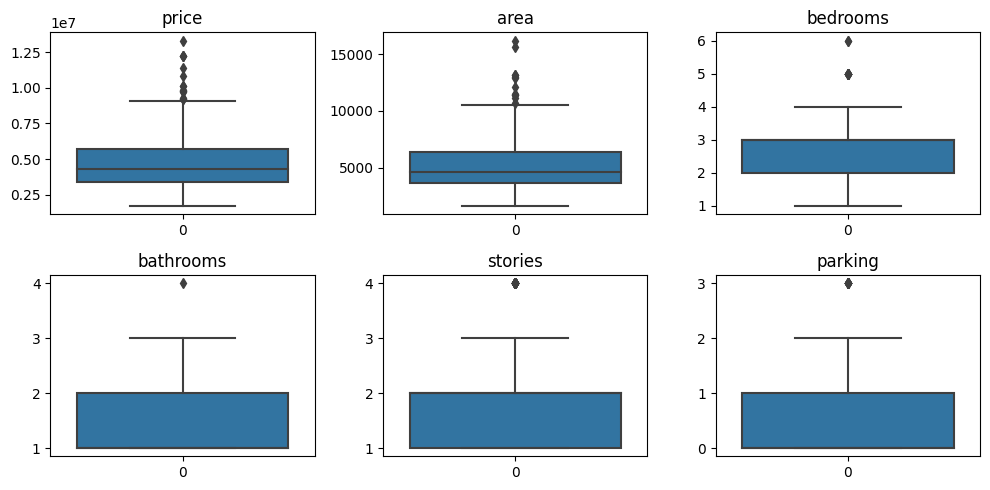

In [ ]:
#Outlier analysis
fig, axs = plt.subplots(2,3,figsize=(10,5))
plt1 = sns.boxplot(df2['price'],ax =axs[0,0])
plt1.set_title('price')
plt2 = sns.boxplot(df2['area'],ax = axs[0,1])
plt2.set_title('area')
plt3 = sns.boxplot(df2['bedrooms'],ax = axs[0,2])
plt3.set_title('bedrooms')
plt1 = sns.boxplot(df2['bathrooms'],ax=axs[1,0])
plt1.set_title('bathrooms')
plt2 = sns.boxplot(df2['stories'],ax=axs[1,1])
plt2.set_title('stories')
plt3 = sns.boxplot(df2['parking'],ax=axs[1,2])
plt3.set_title('parking')

plt.tight_layout()

1st Quartile : 3430000.0
3rd Quartile : 5740000.0


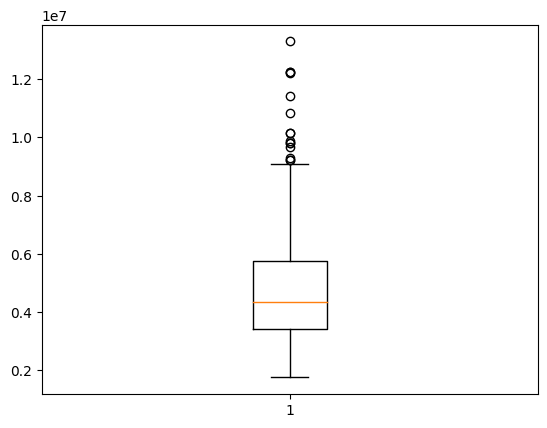

In [ ]:
#Outlier treatment for price
plt.boxplot(df2.price)
Q1 = df2.price.quantile(0.25)
Q3 = df2.price.quantile(0.75)
IQR = Q3 - Q1
df2 = df2[(df2.price>=Q1-1.5*IQR) & (df2.price<=Q3+1.5*IQR)]

print(f"1st Quartile : {Q1}")
print(f"3rd Quartile : {Q3}")

1st Quantile : 3547.5
3rd Quantile : 6315.75


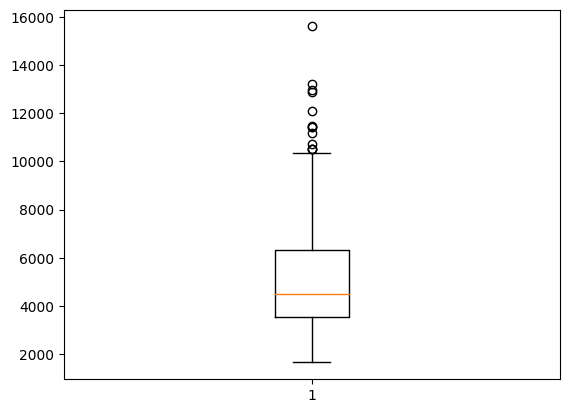

In [ ]:
#Outlier treatment for area
plt.boxplot(df2.area)
Q1 = df2.area.quantile(0.25)
Q3 = df2.area.quantile(0.75)
IQR = Q3 - Q1
df3 = df2[(df2.area>=Q1-1.5*IQR) & (df2.area<=Q3-1.5*IQR)]

print(f"1st Quantile : {Q1}")
print(f"3rd Quantile : {Q3}")

In [ ]:
#Store furnishingstatus column into status
#status = pd.get_dummies(df2['furnishingstatus'])

#Assume '0' as furnished
#status = pd.get_dummies(df2['furnishingstatus'],drop_first = True)

#Show the status
#status.head()

In [ ]:
#Concatenate the status to original dataset
#df2 = pd.concat([df2,status],axis=1)
#df2.head()

In [ ]:
#Drop the furnishingstatus columns
#df2.drop(['furnishingstatus'],axis=1,inplace=True)

In [ ]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,-1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0


# **Exploratory of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
tempt = df.columns.tolist()
tempt.remove("price")
#tempt.remove("area")
for i in tempt:
   print(df[i].value_counts())

6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
0    299
1    126
2    108
3     12
Name: parking, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [ ]:
mean = df.price.mean()
median = df.price.median()
print("Mean and Median of Housing Price")
print(f"Mean   : RM {mean:.2f}")
print(f"Median : RM {median}")

Mean and Median of Housing Price
Mean   : RM 4766729.25
Median : RM 4340000.0


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


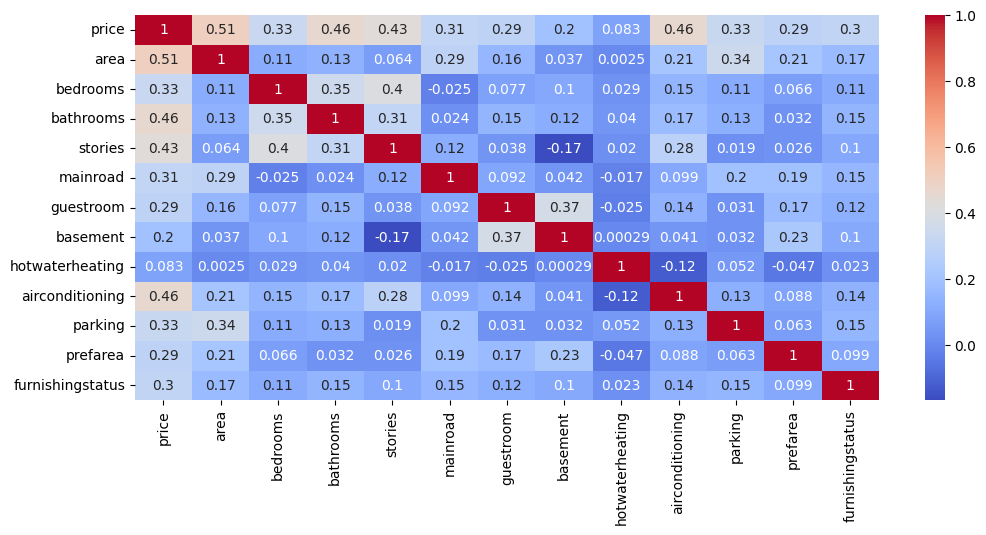

price               1.000000
airconditioning     0.550293
area                0.531339
bathrooms           0.449846
stories             0.449726
bedrooms            0.239604
parking             0.213124
mainroad            0.168957
furnishingstatus    0.123903
prefarea            0.073860
guestroom           0.038394
basement           -0.182042
hotwaterheating    -0.345845
Name: price, dtype: float64


In [ ]:
#Compute Correlation matrix
corr_matrix = df2.corr()

#Create heatmap
plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

plt.show()

corr_matrix = corr_matrix.corr()['price']
corr_matrix = corr_matrix.sort_values(ascending=False)
print(corr_matrix)

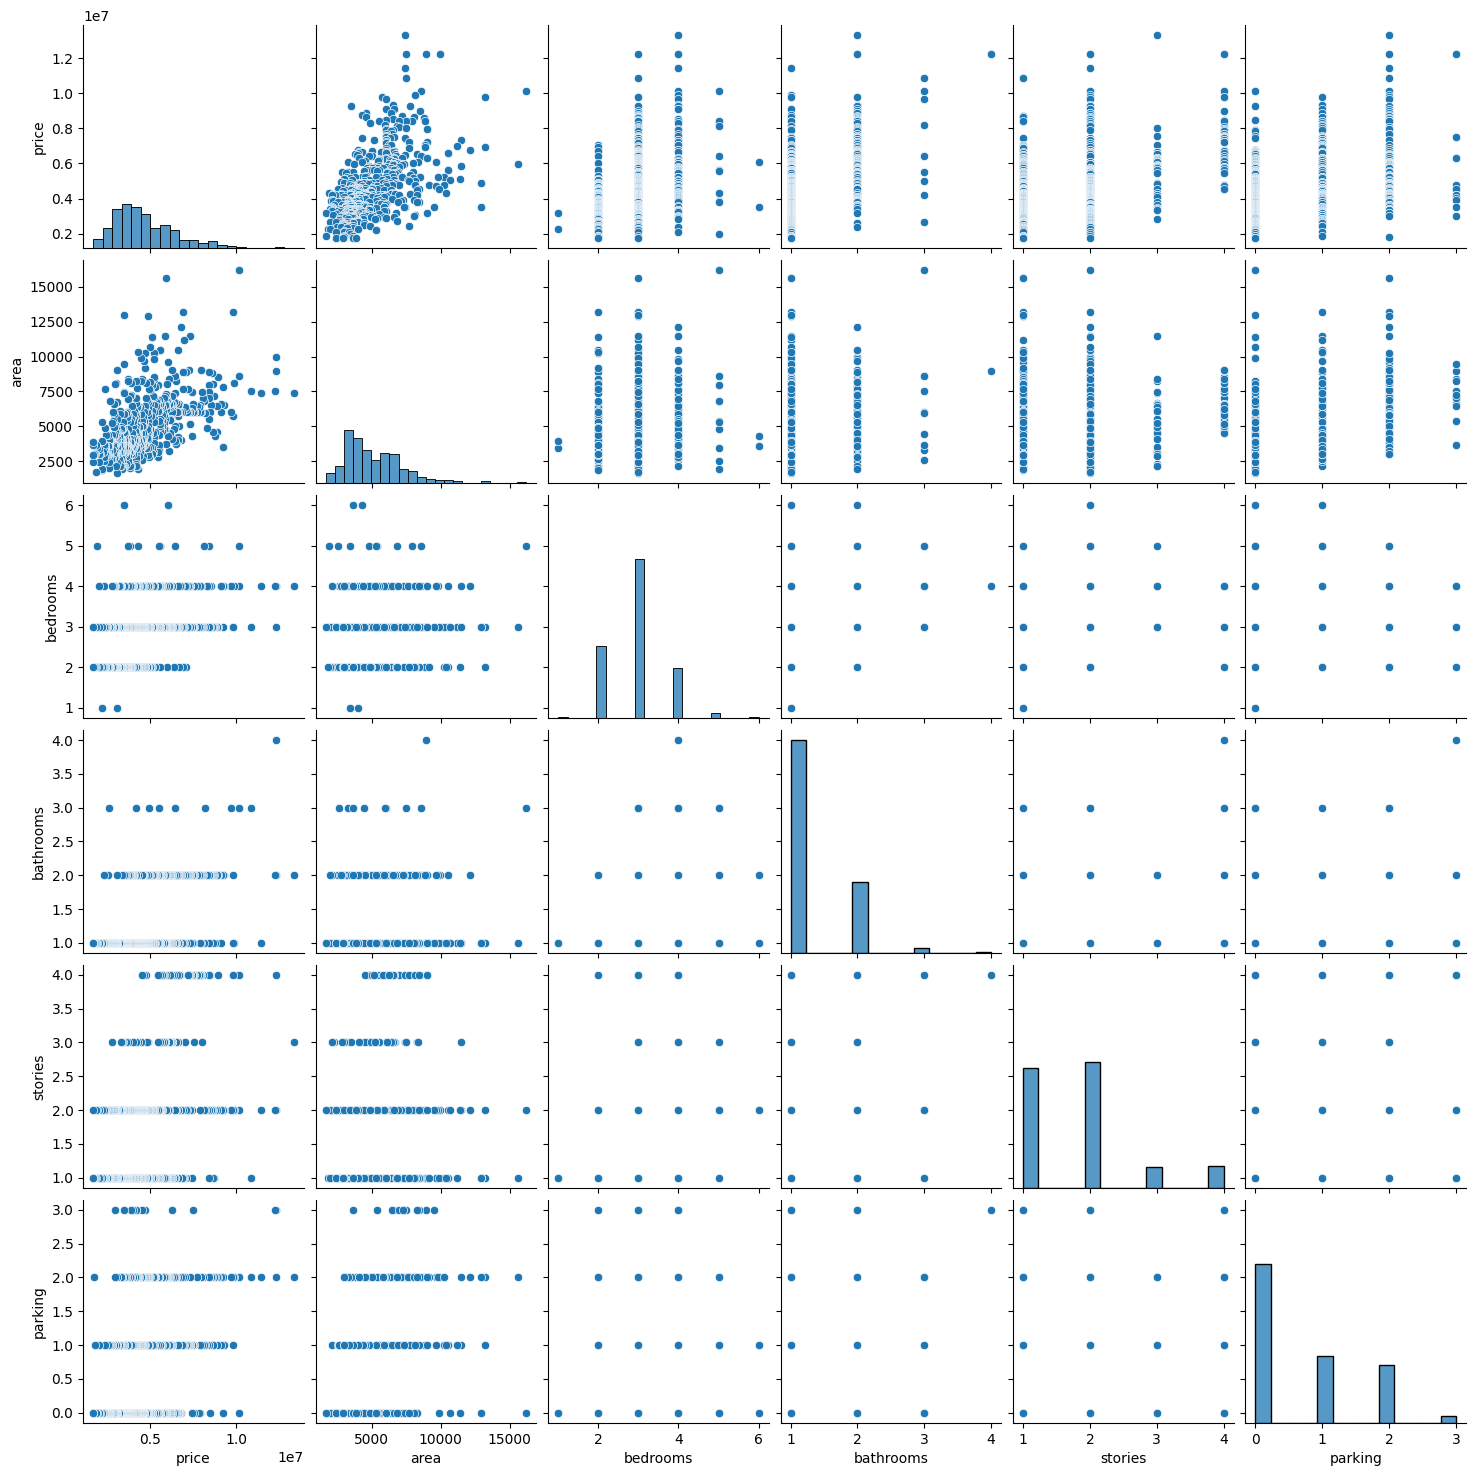

In [ ]:
#Original dataset
sns.pairplot(df)
plt.show()

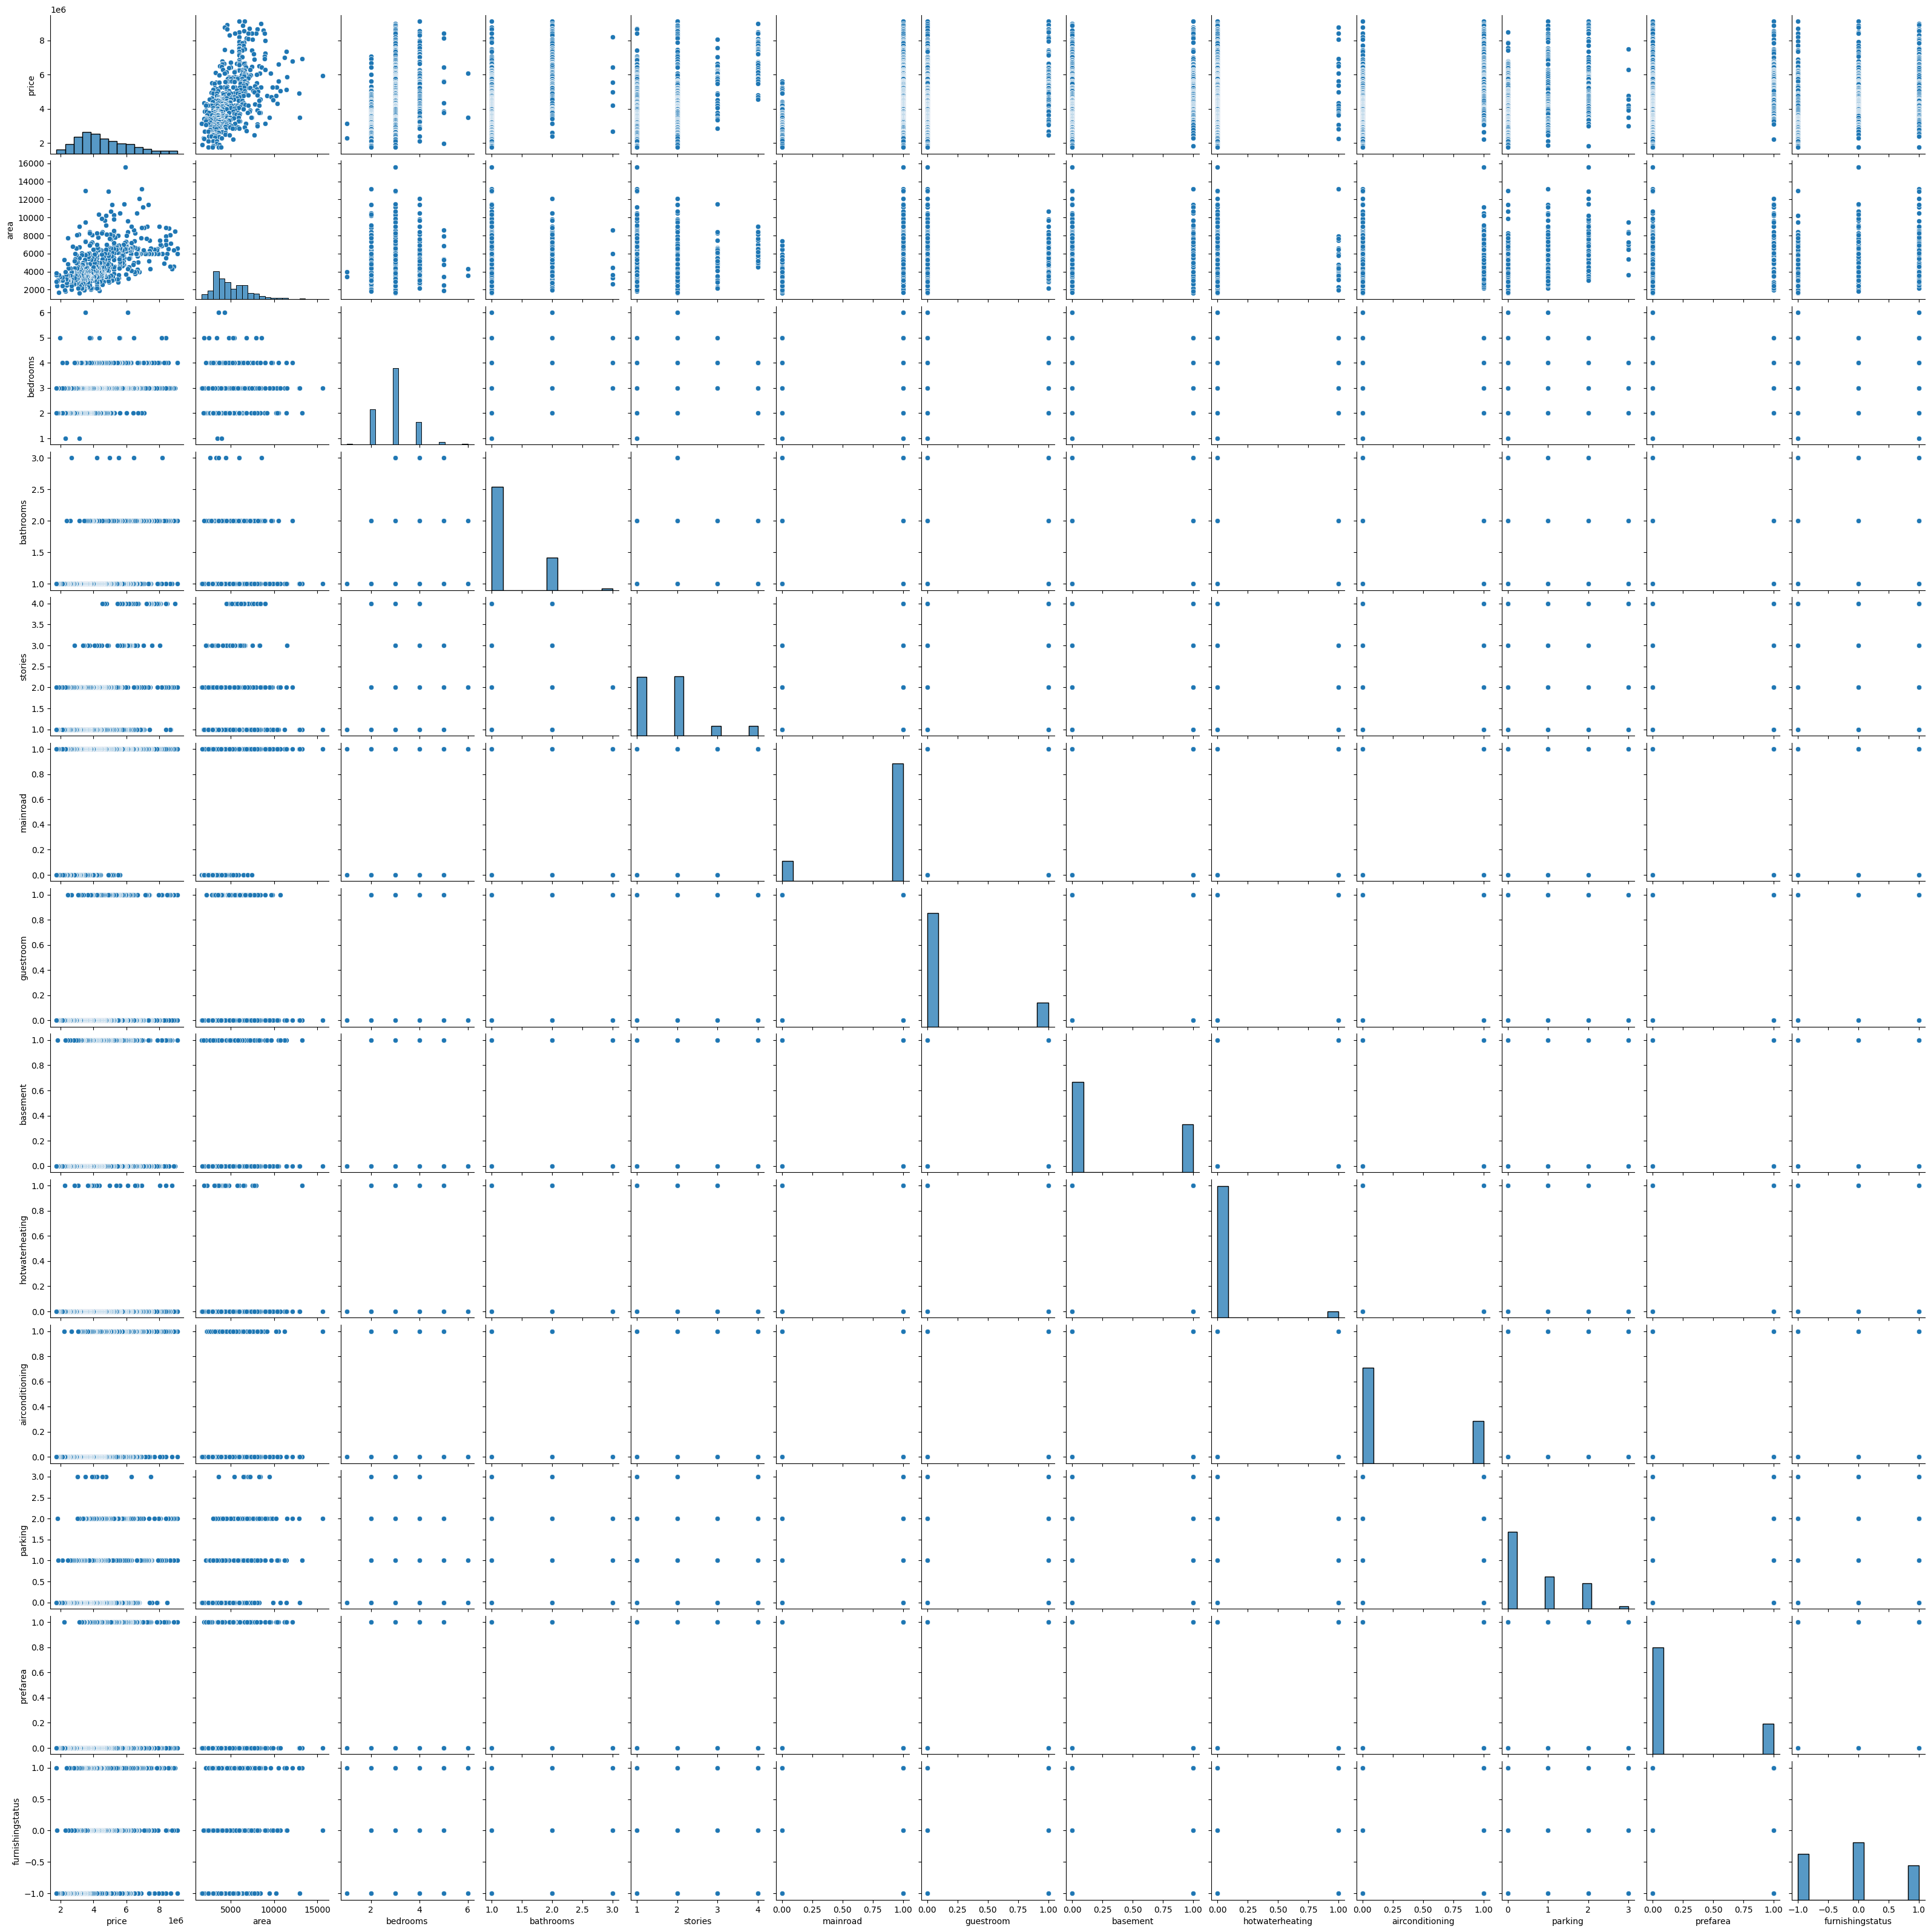

In [ ]:
#Dataset with removing outliers
sns.pairplot(df2)
plt.show()

# ***Linear Regression***
***Method 1***

In [ ]:
#Store price and area into array
x_train = np.array(df['area'])
y_train = np.array(df['price'])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [ 7420  8960  9960  7500  7420  7500  8580 16200  8100  5750 13200  6000
  6550  3500  7800  6000  6600  8500  4600  6420  4320  7155  8050  4560
  8800  6540  6000  8875  7950  5500  7475  7000  4880  5960  6840  7000
  7482  9000  6000  6000  6550  6360  6480  6000  6000  6000  6000  6600
  4300  7440  7440  6325  6000  5150  6000  6000 11440  9000  7680  6000
  6000  8880  6240  6360 11175  8880 13200  7700  6000 12090  4000  6000
  5020  6600  4040  4260  6420  6500  5700  6000  6000  4000 10500  6000
  3760  8250  6670  3960  7410  8580  5000  6750  4800  7200  6000  4100
  9000  6400  6600  6000  6600  5500  5500  6350  5500  4500  5450  6420
  3240  6615  6600  8372  4300  9620  6800  8000  6900  3700  6420  7020
  6540  7231  6254  7320  6525 15600  7160  6500  5500 11460  4800  5828
  5200  4800  7000  6000  5400  4640  5000  6360  5800  6660 10500  4800
  4700  5000 10500  5500  6360  6600  5136  4400  5400  3300  3650  6100
  6900  2817  7980  3150  6210  6100  660

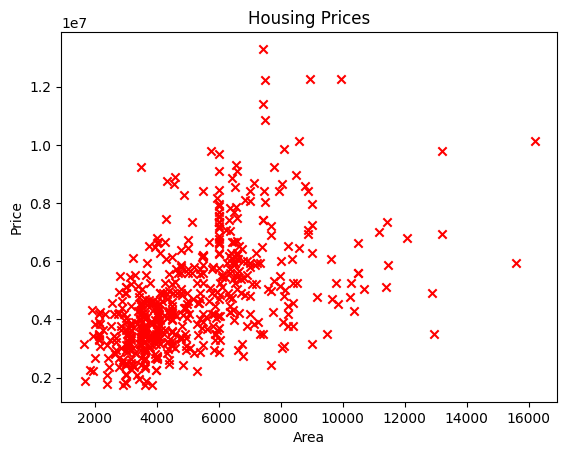

In [ ]:
#Plot the data points
plt.scatter(x_train,y_train,marker='x',c='r')

#Set the title
plt.title("Housing Prices")

#Set the y-axis label
plt.ylabel('Price')

#Set the x-axis label
plt.xlabel('Area')

plt.show()

In [ ]:
#f_wb = w * x[i] + b
def compute_model_output(x,w,b):
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
     f_wb[i] = w * x[i] + b

  return f_wb

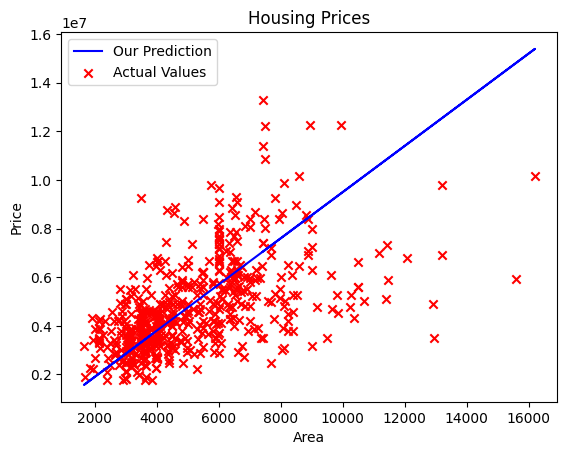

In [ ]:
tem_f_wb = compute_model_output(x_train,950,400)

#Plot our model prediction
plt.plot(x_train,tem_f_wb,c='b',label='Our Prediction')

#Plot the data points
plt.scatter(x_train,y_train,marker='x',c='r',label='Actual Values')

#Set the title
plt.title("Housing Prices")

#Set the y-axis label
plt.ylabel('Price')

#Set the x-axis label
plt.xlabel('Area')

plt.legend()
plt.show()

In [ ]:
#Prediction
w = 950
b = 400
#area = float(input("Enter area : "))
area = 200
predicted_price = w*area+b
print("Predicted price : RM " + str(predicted_price))

Predicted price : RM 190400


In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

#Check the accuracy of this prediction
xTrain,xTest,yTrain,yTest = train_test_split(df[['area']],df.price,test_size=0.25)

regr = LinearRegression()

regr.fit(xTrain,yTrain)

#Evaluate the performance of linear regression
print(regr.score(xTrain,yTrain))

y_pred = regr.predict(xTest)

#R-squared value
print("R2 score = ", round(sm.r2_score(yTest,y_pred),2))

0.264573509749062
R2 score =  0.35


**Method 2**

In [ ]:
#Linear regression
#Calculate predicted price by using linear_model library
reg = LinearRegression()

#Reg the data into the regression model
#Area independent variable
#Price dependent variable
reg.fit(df2[['area']],df2['price'])

#area = int(input("Enter area          : "))
area_input = 2000

print(f"\ny = wx + b")
print(f"w                   : {reg.coef_}")
print(f"b                   : {reg.intercept_}")
print(f"Area entered        : {area_input}")
predicted_price = reg.predict([[area_input]])
print(f"Predicted price     : RM {predicted_price[0]:.2f}")


y = wx + b
w                   : [392.10344163]
b                   : 2616024.126368602
Area entered        : 2000
Predicted price     : RM 3400231.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


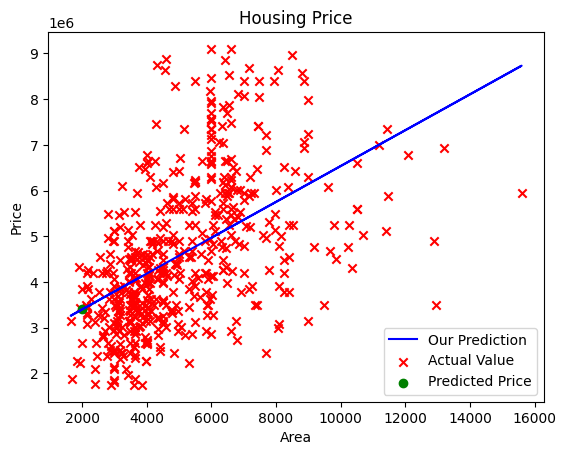

In [ ]:
#Plot the prediction model
plt.plot(df2.area,reg.predict(df2[['area']]),c='b',label = 'Our Prediction')
plt.scatter(df2.area,df2.price,marker='x',c='r',label = 'Actual Value')
plt.scatter(area_input,predicted_price[0],c='g',label = "Predicted Price")
plt.title("Housing Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

regr = LinearRegression()

xTrain,xTest,yTrain,yTest = train_test_split(df2[['area']],df2.price,test_size=0.25,random_state=16)

regr.fit(xTrain,yTrain)

y_pred = regr.predict(xTest)

print(regr.score(xTrain,yTrain))
#R-squared value
print("R2 Score : ",round(sm.r2_score(yTest,y_pred),2))

0.2506996016082277
R2 Score :  0.28


# ***Multivariate Linear Regression***

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x_var = np.array(df[['area','bedrooms','bathrooms','stories','parking']])
reg.fit(x_var,df.price)

LinearRegression()

In [ ]:
for i in range (x_var[0].size):
     print(f"Coefficient {i+1} : {reg.coef_[i]}")

print(f"Intercept     : {reg.intercept_}")

Coefficient 1 : 331.1154953040509
Coefficient 2 : 167809.78805777594
Coefficient 3 : 1133740.1626847433
Coefficient 4 : 547939.8095131849
Coefficient 5 : 377596.28871256596
Intercept     : -145734.4894558806


In [ ]:
area_input = 2000
bedroom_input = 2
bathrooms_input = 2
stories_input = 2
parking_input = 2

predicted_price = reg.predict([[area_input,bedroom_input,bathrooms_input,stories_input,parking_input]])

print(f"Area      input : {area_input}")
print(f"Bedrooms  input : {bedroom_input}")
print(f"Bathrooms input : {bathrooms_input}")
print(f"Stories   input : {stories_input}")
print(f"Parking   input : {parking_input}")
print(f"Predicted price : RM {predicted_price[0]:.2f}")


Area      input : 2000
Bedrooms  input : 2
Bathrooms input : 2
Stories   input : 2
Parking   input : 2
Predicted price : RM 4970668.60


In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

#Check the accuracy of this prediction
xTrain,xTest,yTrain,yTest = train_test_split(x_var,df.price,test_size=0.25)

regr = LinearRegression()

regr.fit(xTrain,yTrain)

#Evaluate the performance of linear regression
print(regr.score(xTrain,yTrain))

y_pred = regr.predict(xTest)

#R-squared value
print("R2 score = ", round(sm.r2_score(yTest,y_pred),2))

0.5803847338480512
R2 score =  0.5


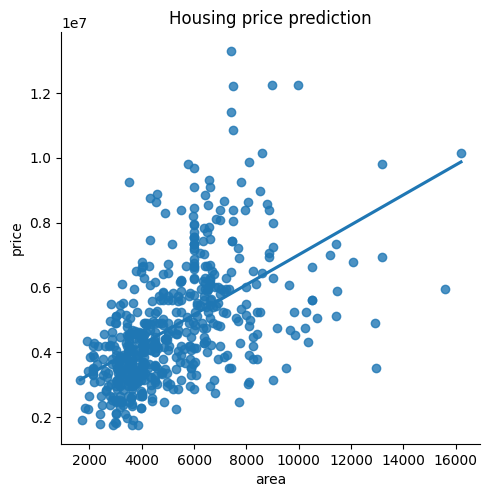

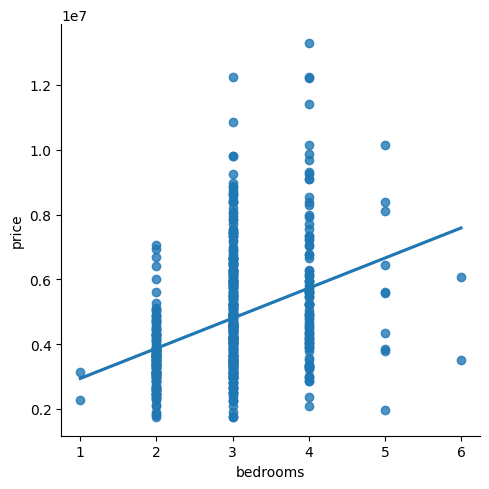

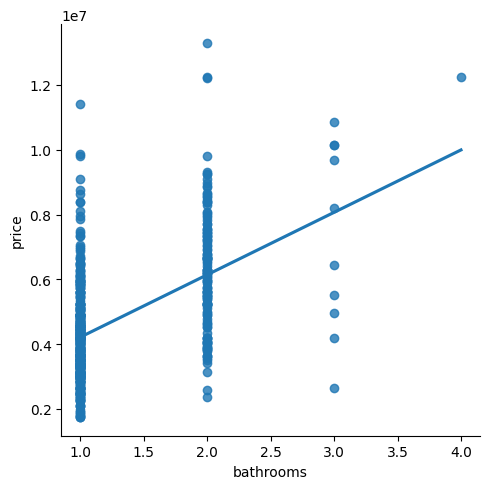

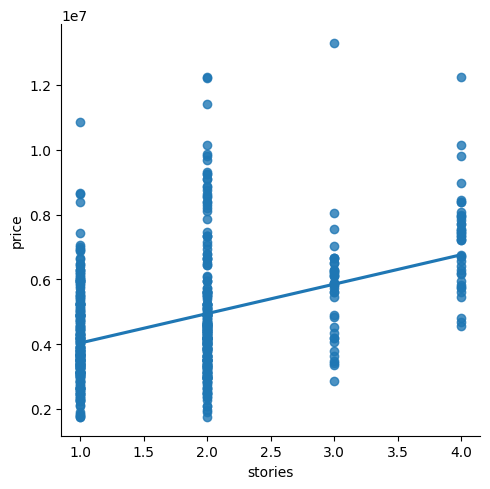

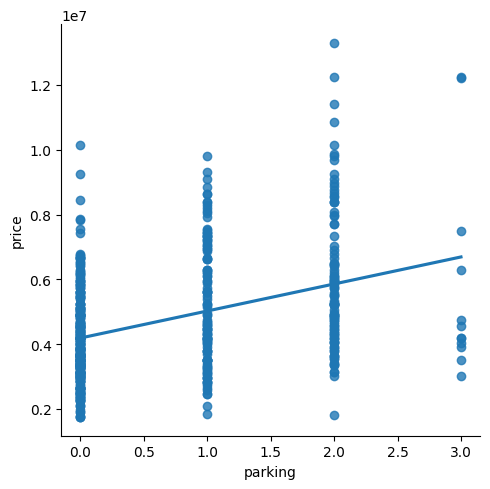

In [ ]:
sns.lmplot(x="area",y="price",data = df,ci=None)
plt.title("Housing price prediction")
plt.show()

sns.lmplot(x="bedrooms",y="price",data=df,ci=None)
plt.show()

sns.lmplot(x="bathrooms",y="price",data=df,ci=None)
plt.show()

sns.lmplot(x="stories",y="price",data=df,ci=None)
plt.show()

sns.lmplot(x="parking",y ="price",data=df,ci=None)
plt.show()

**Condition 2**




In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x_var = np.array(df2[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']])
reg.fit(x_var,df2.price)

LinearRegression()

In [ ]:
for i in range (x_var[0].size):
   print(f"Coefficient {i+1} : {reg.coef_[i]:.2f}")

print(f"Intercept : {reg.intercept_:.2f}")

Coefficient 1 : 217.35
Coefficient 2 : 82197.73
Coefficient 3 : 775026.24
Coefficient 4 : 462832.94
Coefficient 5 : 456853.94
Coefficient 6 : 359113.60
Coefficient 7 : 362563.10
Coefficient 8 : 762318.23
Coefficient 9 : 814074.69
Coefficient 10 : 208598.10
Coefficient 11 : 478932.21
Coefficient 12 : 195343.75
Intercept : 363300.80


In [ ]:
#Inputs based on the features
area_input = 2000
bedroom_input = 2
bathrooms_input = 2
stories_input = 2
parking_input = 2

#'1' - yes , '0' - no
mainroad_input = 1
guestroom_input = 1
basement_input = 1
hotwater_input = 1
aircondition_input = 1
prefarea_input = 1

#'-1' - unfurnished, '0' - semi-furnished, '1' - furnished
furnish_input = 1

predicted_price = reg.predict([[area_input,bedroom_input,bathrooms_input,stories_input,
                                mainroad_input,guestroom_input,basement_input,hotwater_input,
                                aircondition_input,parking_input,prefarea_input,furnish_input]])

print(f"Area      input : {area_input}")
print(f"Bedrooms  input : {bedroom_input}")
print(f"Bathrooms input : {bathrooms_input}")
print(f"Stories   input : {stories_input}")
print(f"Parking   input : {parking_input}")
print("\n")
print("Mainroad      input : ", "no" if mainroad_input==0 else "yes")
print("Guestroom     input : ", "no" if mainroad_input==0 else "yes")
print("Basement      input : ", "no" if mainroad_input==0 else "yes")
print("Hotwater      input : ", "no" if mainroad_input==0 else "yes")
print("Aircondition  input : ", "no" if mainroad_input==0 else "yes")
print("Prefarea      input : ", "no" if mainroad_input==0 else "yes")
print("\n")
print("Furnished status input :  ","Unfurnished" if furnish_input == -1 else("Semi-furnished" if furnish_input== 0 else "Furnished"))
print("\n")
print(f"Predicted price : RM {predicted_price[0]:.2f}")



Area      input : 2000
Bedrooms  input : 2
Bathrooms input : 2
Stories   input : 2
Parking   input : 2


Mainroad      input :  yes
Guestroom     input :  yes
Basement      input :  yes
Hotwater      input :  yes
Aircondition  input :  yes
Prefarea      input :  yes


Furnished status input :   Furnished


Predicted price : RM 7284516.33


In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

#Check the accuracy for the prediction
xTrain,xTest,yTrain,yTest = train_test_split(x_var,df2.price,test_size=0.25,random_state=16)

regr = LinearRegression()

regr.fit(xTrain,yTrain)

y_pred = regr.predict(xTest)

#Evaluate the performance of the linear regression
print(regr.score(xTrain,yTrain))

#R-squared value
print("R2 score = ",round(sm.r2_score(yTest,y_pred),2))


0.6800018460004819
R2 score =  0.6


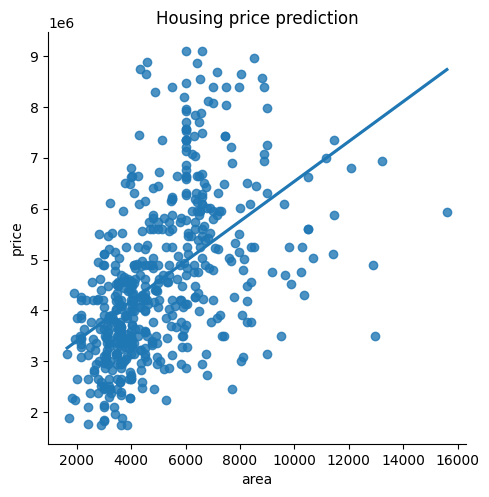

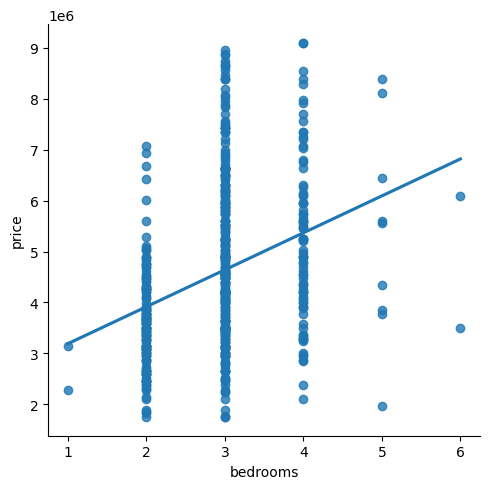

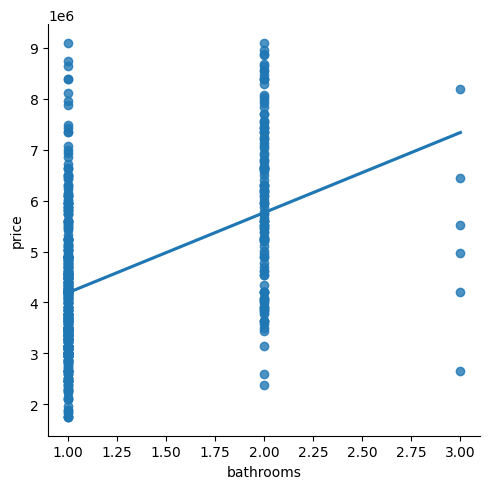

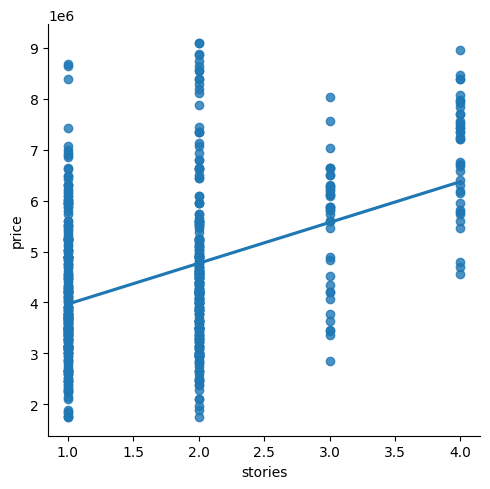

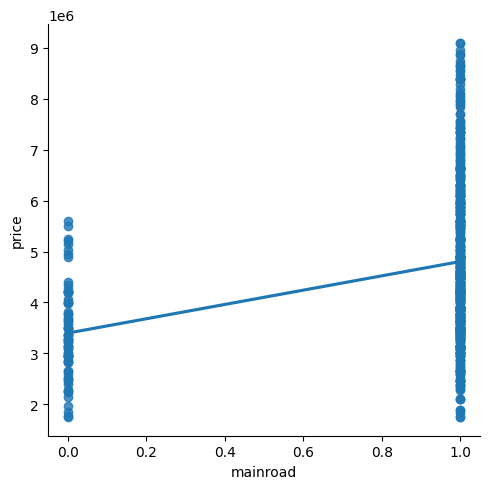

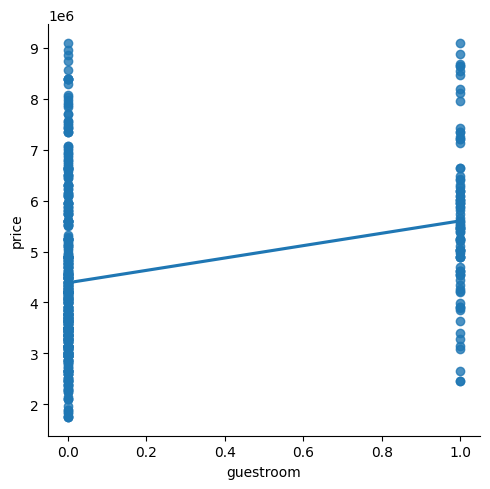

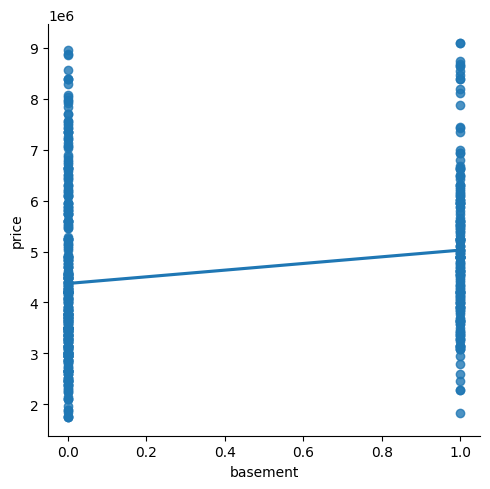

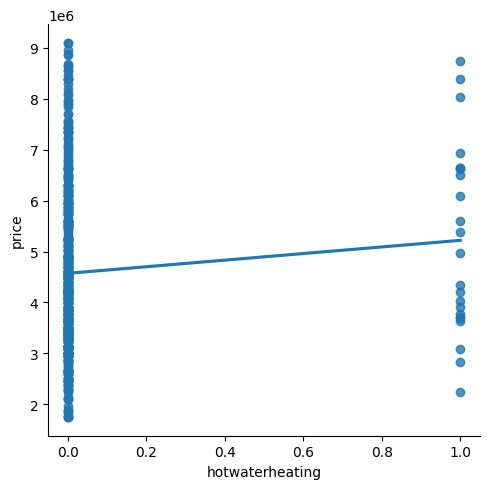

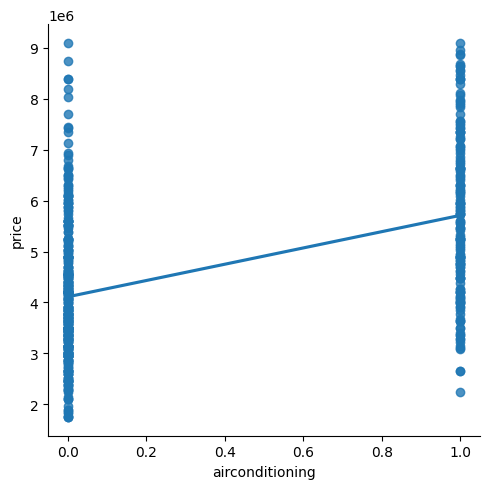

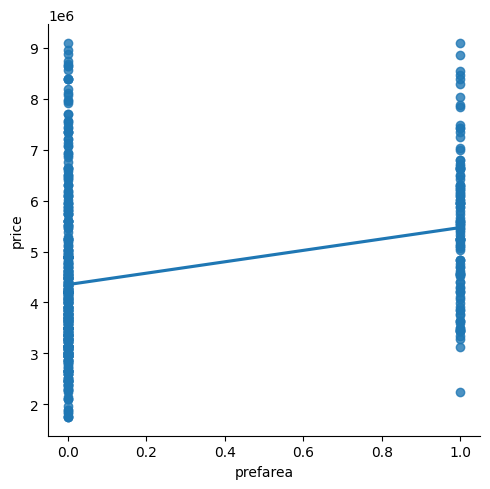

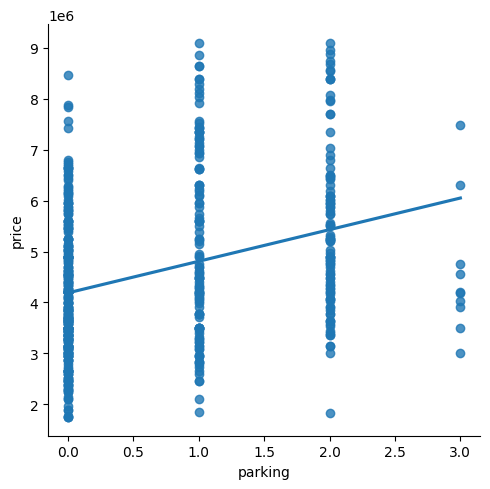

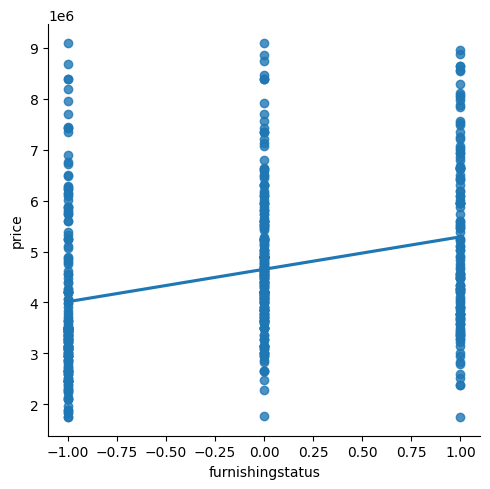

In [ ]:
sns.lmplot(x="area",y="price",data = df2,ci=None)
plt.title("Housing price prediction")
plt.show()

sns.lmplot(x="bedrooms",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="bathrooms",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="stories",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="mainroad",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="guestroom",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="basement",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="hotwaterheating",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="airconditioning",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="prefarea",y="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="parking",y ="price",data=df2,ci=None)
plt.show()

sns.lmplot(x="furnishingstatus",y="price",data=df2,ci=None)
plt.show()

# **Method 2**

In [ ]:
#Split the dataset into training and testing sets
np.random.seed(0)
df_train,df_test = train_test_split(df2,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
#Rescalling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
columns = ['price','area','bedrooms','bathrooms','stories','parking']
df_train[columns] = scaler.fit_transform(df_train[columns])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
48,0.776190,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,-1
465,0.176190,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,-1
144,0.523810,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,1
395,0.238095,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,-1
254,0.371429,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,0


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.386021,0.241122,0.389757,0.125337,0.261456,0.846361,0.172507,0.350404,0.048518,0.309973,0.219227,0.210243,-0.056604
std,0.212167,0.143626,0.144831,0.226142,0.277672,0.361089,0.378331,0.477741,0.215147,0.463107,0.282378,0.408031,0.734868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.238095,0.136559,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.523810,0.327957,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Import RFE and LinearRegression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
#Dividing the training sets into x and y for model building
#pop return and remove
yTrain = df_train.pop('price')
xTrain = df_train
xTrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
48,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,-1
465,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,-1
144,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,1
395,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,-1
254,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,0


In [ ]:
regs=LinearRegression()
regs.fit(xTrain,yTrain)

LinearRegression()

In [ ]:
#Recursive Feature Elimination (RFE) algorithm to select
#the most important features in a dataset for regression modeling.
#6 represents selecting the most importance features
rfe = RFE(regs,step = 6) #- correct
#rfe = RFE(regs,n_features_to_select=6)
rfe = rfe.fit(xTrain, yTrain)

In [ ]:
#rfe.support_ shows whether the features is importance or not
#Display true - yes, false - no
list(zip(xTrain.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 2),
 ('guestroom', False, 2),
 ('basement', False, 2),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('furnishingstatus', False, 2)]

In [ ]:
column = xTrain.columns[rfe.support_]
column

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [ ]:
xTrain.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'furnishingstatus'],
      dtype='object')

In [ ]:
#Building model using statsmodel,for the detailed statistics
#Create dataframe with RFE selected varaibles
xTrain_rfe = xTrain[column]
xTrain_rfe.head()

,area,bathrooms,stories,hotwaterheating,airconditioning,prefarea
48,0.189964,0.5,0.333333,0,0,0
465,0.154122,0.0,0.000000,0,0,0
144,0.218638,0.0,0.333333,0,1,0
395,0.139785,0.0,0.333333,0,0,0
254,0.205018,0.0,0.333333,0,1,0


In [ ]:
#Adding constant to the variable
'''
In linear regression, the addition of a constant variable
(also known as an intercept term) allows the regression line
to shift up and down on the y-axis, rather than being force
to pass through the origin (0,0). This is important
because in many real-world scenarios, the dependent variable (y)
is not equal to zero when all independent variables (x)
are equal to zero.

Therefore, adding a constant variable (intercept term) is necessary
for accurate and meaningful interpretation of the coefficients and
predictions from a linear regression model.
'''
import statsmodels.api as sm
xTrain_rfe = sm.add_constant(xTrain_rfe)
xTrain_rfe.head()

,const,area,bathrooms,stories,hotwaterheating,airconditioning,prefarea
48,1.0,0.189964,0.5,0.333333,0,0,0
465,1.0,0.154122,0.0,0.000000,0,0,0
144,1.0,0.218638,0.0,0.333333,0,1,0
395,1.0,0.139785,0.0,0.333333,0,0,0
254,1.0,0.205018,0.0,0.333333,0,1,0


In [ ]:
#Fit a linear regression model on the training data.
#This library provides the info for the model
regs = sm.OLS(yTrain,xTrain_rfe).fit()

print(regs.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     90.72
Date:                Sun, 28 May 2023   Prob (F-statistic):           3.19e-69
Time:                        02:47:37   Log-Likelihood:                 218.90
No. Observations:                 371   AIC:                            -423.8
Df Residuals:                     364   BIC:                            -396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1123      0.015     

In [ ]:
#Calculate VIR for the model
'''
A VIF value of 1 indicates that there is no correlation
among the independent variables. VIF values greater
than 1 indicate that multicollinearity may be present.
A commonly used rule of thumb is that a VIF value greater
than 5 or 10 indicates high multicollinearity, although
this threshold can vary depending on the context and the
specific problem.
'''

#import the library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
x = xTrain_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,4.72
5,airconditioning,1.16
3,stories,1.15
1,area,1.11
2,bathrooms,1.11
6,prefarea,1.07
4,hotwaterheating,1.04


In [ ]:
#Analysis for trained data
yTrain_price = regs.predict(xTrain_rfe)

In [ ]:
res = (yTrain_price - yTrain)

<ipython-input-61-f7963941fc42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((yTrain-yTrain_price),bins=20)


Text(0.5, 0, 'Errors')

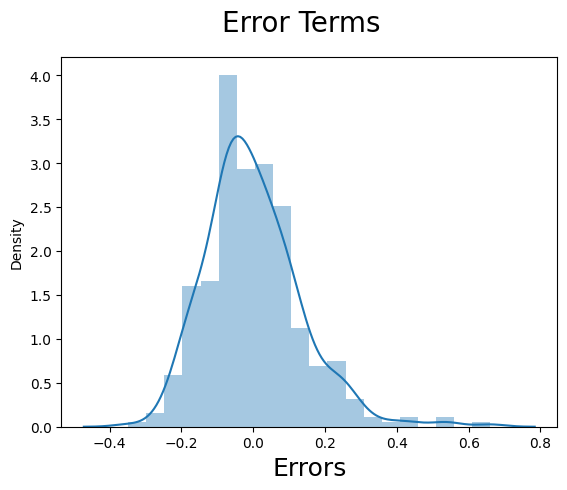

In [ ]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((yTrain-yTrain_price),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

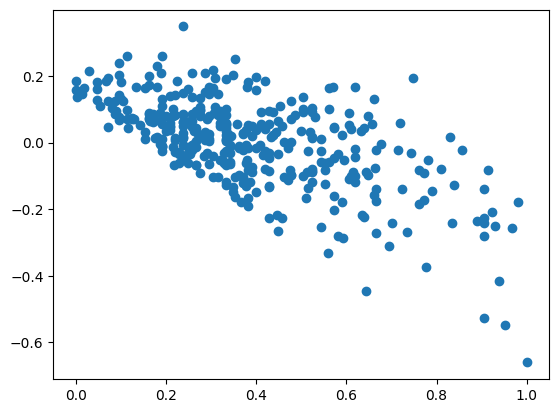

In [ ]:
plt.scatter(yTrain,res)
plt.show()

In [ ]:
#Model evaluation
#Applying the scaling on the test sets
num_vars = ['area','stories', 'bathrooms', 'bedrooms', 'mainroad','guestroom','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[xTrain_rfe.columns]

In [ ]:
#Making prediction
# Making predictions
y_pred = regs.predict(X_test_rfe)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5832154960181067

Text(0, 0.5, 'y_pred')

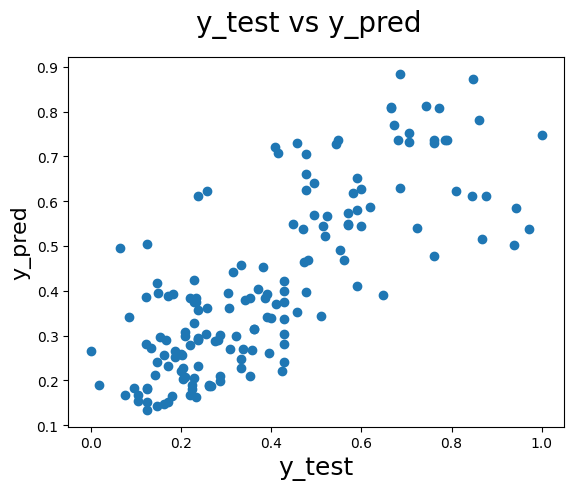

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# ***Polynomial Regression***
**Condition 1**

Text(0.5, 1.0, 'Housing price versus Area')

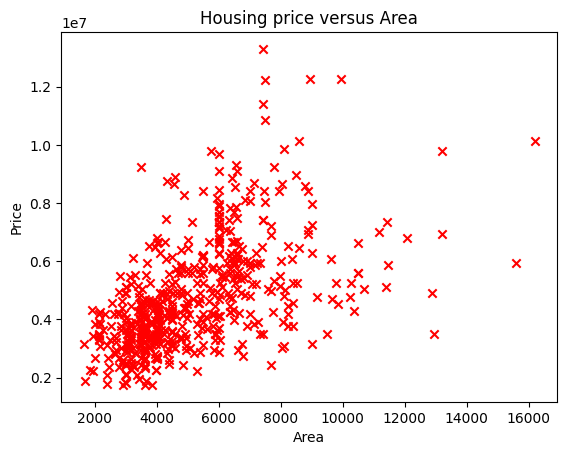

In [ ]:
x = df.area
y = df.price

plt.scatter(x,y,c='r',marker='x')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Housing price versus Area")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pre_process = PolynomialFeatures(degree = 2)

x_poly = pre_process.fit_transform(df[['area']])
x_poly

array([[1.00000e+00, 7.42000e+03, 5.50564e+07],
       [1.00000e+00, 8.96000e+03, 8.02816e+07],
       [1.00000e+00, 9.96000e+03, 9.92016e+07],
       ...,
       [1.00000e+00, 3.62000e+03, 1.31044e+07],
       [1.00000e+00, 2.91000e+03, 8.46810e+06],
       [1.00000e+00, 3.85000e+03, 1.48225e+07]])

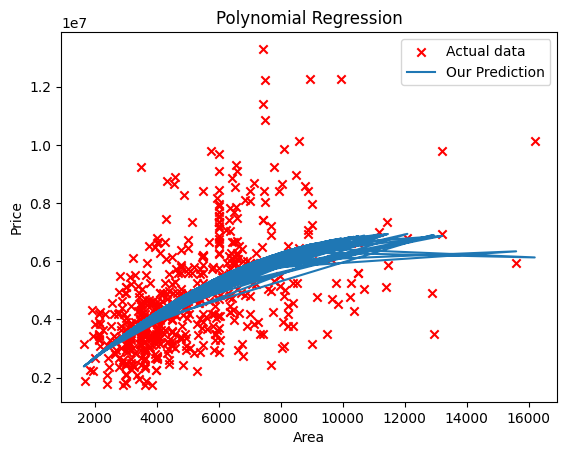

In [ ]:
pr_model = LinearRegression()
pr_model.fit(x_poly,y)
y_pred = pr_model.predict(x_poly)

plt.scatter(x,y,c='r',marker='x',label='Actual data')
plt.title("Polynomial Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.plot(x,y_pred,label='Our Prediction')
plt.legend()

In [ ]:
intercept = pr_model.intercept_
#_,theta1,theta2 = pr_model.coef_

area_input = 1107
y_new = pr_model.predict(pre_process.fit_transform([[area_input]]))

print(f"b  : {intercept:.2f}")
#print(f"w1 : {theta1:.2f}")
#print(f"w2 : {theta2:.2f}")
print(f"Area input      : {area_input}")
print(f"Predicted Price : RM {y_new[0]:.2f}")

b  : 795440.76
Area input      : 1107
Predicted Price : RM 1888004.33


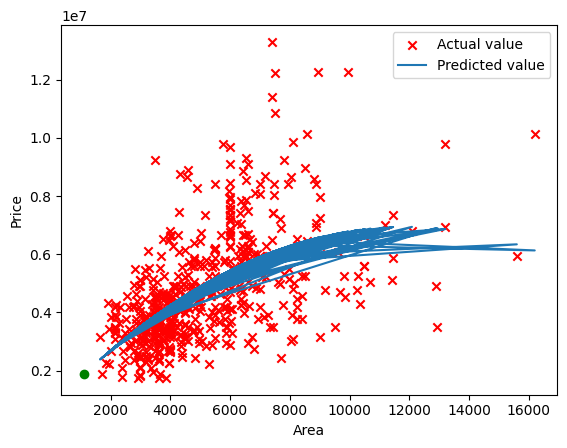

In [ ]:
#Green dot is the predicted value
plt.scatter(x,y,c='r',marker='x',label='Actual value')
plt.plot(x,y_pred,label='Predicted value')
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(area_input,y_new,c='green')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as sm

mse = mean_squared_error(y,y_pred)
print(f"Mean squared error      :  {mse:.2f}")

rmse = np.sqrt(mse)
print("Root Mean Squared Error : ", rmse)

mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error     : ", mae)

mape = np.mean(np.abs((y - y_pred) / y)) * 100
print("Mean Absolute Percentage Error : ",mape)

Mean squared error      :  2363908046361.73
Root Mean Squared Error :  1537500.5841825656
Mean Absolute Error     :  1148439.439579324
Mean Absolute Percentage Error :  26.136818728269066


#***Logistic Regression***
**Condition 1**

In [ ]:
mean_price = df['price'].mean()

df['price above mean'] = df['price'].apply(lambda x:1 if x >=mean_price else 0)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price above mean
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1


In [ ]:
feature_cols = ['area','bedrooms','bathrooms','stories','parking']
x = df[feature_cols]       #Features
y = df['price above mean'] #Target variable

In [ ]:
#Split x and y into training and testing sets
#Split 25% to test case and split 75% to  training case
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.25,random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

#Instantiaate the model
logreg = LogisticRegression(random_state=16)

#Fit the model with data
logreg.fit(xTrain,yTrain)

y_pred = logreg.predict(xTest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#import the metric class
#Check the accuracy of the algorithms
"""
Diagonal values represent accurate predictions,
while non-diagonal elements are inaccurate predictions.
In the output, 71 and 12 are actual predictions,
and 19 and 12 are incorrect predictions.
"""
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(yTest,y_pred)
cnf_matrix

array([[71, 12],
       [19, 35]])

Text(0.5, 427.9555555555555, 'Predicted label')

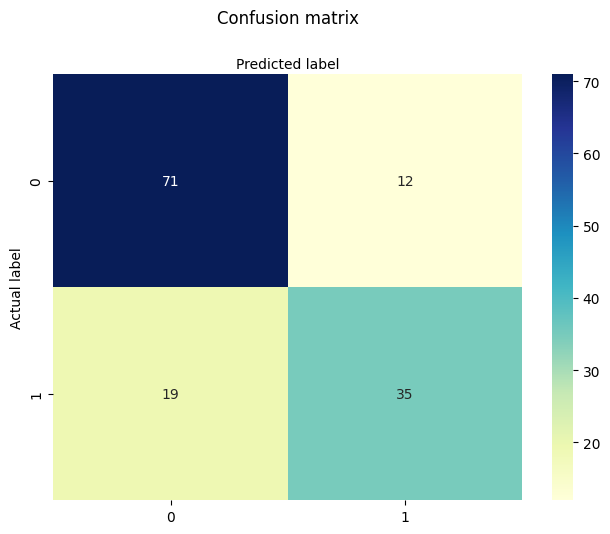

In [ ]:
#Visualizing confusion matrix using heatmap
#import the required modules
import seaborn as sns

#Name of the class
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Create heatmap
#annot indicates the text inside the box
#fmt indicates word forms exp b indicates binary
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')

#Move the x axis label from bottom to top
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
#Evaluate the model using classification_report for accuracy and precision
from sklearn.metrics import classification_report
target_names = ['Price lower than mean','Price higher than mean']
print(classification_report(yTest,y_pred,target_names = target_names))

                        precision    recall  f1-score   support

 Price lower than mean       0.79      0.86      0.82        83
Price higher than mean       0.74      0.65      0.69        54

              accuracy                           0.77       137
             macro avg       0.77      0.75      0.76       137
          weighted avg       0.77      0.77      0.77       137



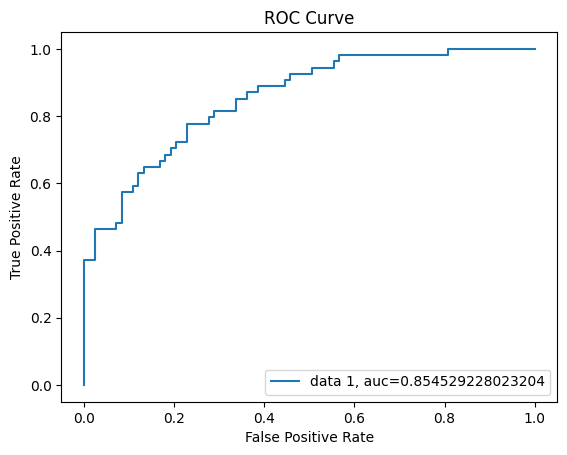

In [ ]:
#AUC score for the case is 0.85.
#AUC score 1 represents a perfect classifier,
#and 0.5 represents a worthless classifie
y_pred_proba = logreg.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba)
auc = metrics.roc_auc_score(yTest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#'area','bedrooms','bathrooms','stories','parking'
"""
area_input    = int(input("Enter area      : "))
bedroom_input = int(input("Enter bedrooms  : "))
bathroom_input= int(input("Enter bathrooms : "))
story_input   = int(input("Enter stories   : "))
park_input    = int(input("Enter parking   : "))

"""
area_input    = 100
bedroom_input = 1
bathroom_input= 1
story_input   = 1
park_input    = 1

input = [[area_input,bedroom_input,bathroom_input,story_input,park_input]]
y_pred = logreg.predict(input)

if(y_pred[0]==1):
   print(f"Price is higher or equals to mean price (RM {mean_price:.2f})")
else:
   print(f"Price is lower than mean price (RM {mean_price:.2f})")



Price is lower than mean price (RM 4766729.25)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Condition 2**

In [ ]:
mean_price = df2.price.mean()
df2['price above mean'] = df['price'].apply(lambda x:1 if x >=mean_price else 0)
features_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
x = df2[features_cols]
y = df2['price above mean']

In [ ]:
#Spilt the dataset into test case and training case
#Test case - 25%
#Training case - 75%
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.25,random_state=16)

In [ ]:
#import the library
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg = logreg.fit(xTrain,yTrain)

y_pred = logreg.predict(xTest)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(yTest,y_pred)
cnf_matrix

array([[63, 15],
       [19, 36]])

Text(0.5, 427.9555555555555, 'Predicted label')

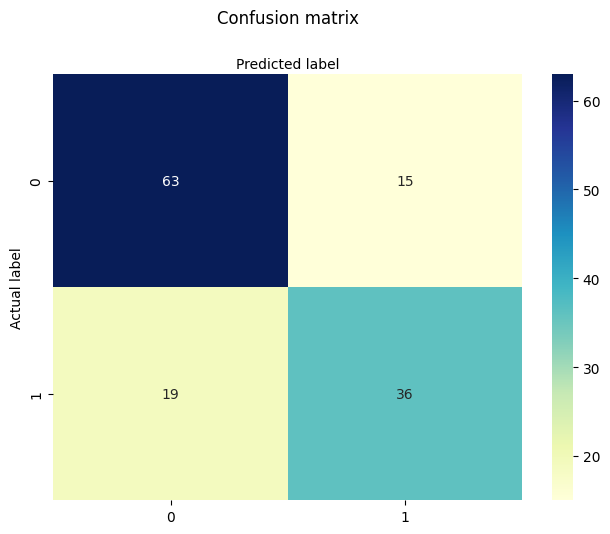

In [ ]:
#Visualizing confusion matrix using heatmap
#import the required modules
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
# y is the position of the title
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Price lower than mean','Price higher than mean']
print(classification_report(yTest,y_pred,target_names=target_names))

                        precision    recall  f1-score   support

 Price lower than mean       0.77      0.81      0.79        78
Price higher than mean       0.71      0.65      0.68        55

              accuracy                           0.74       133
             macro avg       0.74      0.73      0.73       133
          weighted avg       0.74      0.74      0.74       133



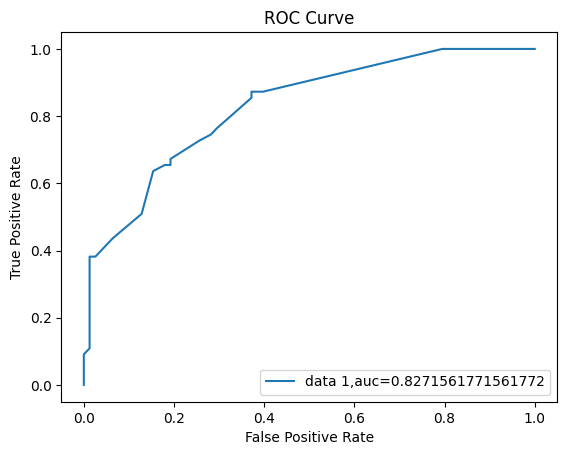

In [ ]:
#AUC score for the case is 0.79
#AUC score 1 represents a prefect classifier
#and 0.5 represent a worthless classifie
y_pred_proba = logreg.predict_proba(xTest)[::,1]
fpr,tpr,_ = metrics.roc_curve(yTest,y_pred_proba)
auc = metrics.roc_auc_score(yTest,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#User input to predict the price
#'1' for yes and '0' for no
mainroad_input = 1
guestroom_input = 1
basement_input = 1
hotwater_input = 1
aircondition_input= 1
prefarea_input = 1;

input = [[mainroad_input,guestroom_input,basement_input,hotwater_input,aircondition_input,prefarea_input]]

y_pred = logreg.predict(input)

if(y_pred[0]==1):
   print(f"Price is higher or equals to mean price (RM {mean_price:.2f})")
else:
   print(f"Price is lower to mean price (RM {mean_price:.2f})")

Price is higher or equals to mean price (RM 4600663.09)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Condition 3**

In [ ]:
features_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
x = df2.drop(['price','price above mean'],axis=1)
y = df2['price above mean']

In [ ]:
#Spilt the dataset into test case and training case
#Test case - 25%
#Training case - 75%
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.25,random_state=16)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg = logreg.fit(xTrain,yTrain)

y_pred = logreg.predict(xTest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(yTest,y_pred)
cnf_matrix

array([[64, 14],
       [17, 38]])

Text(0.5, 427.9555555555555, 'Predicted label')

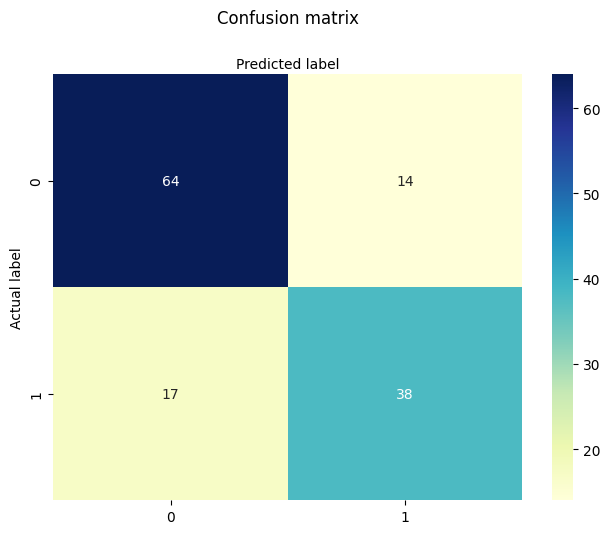

In [ ]:
#Visualizing confusion matrix using heatmap
#import the required modules
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
# y is the position of the title
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Price lower than mean','Price higher than mean']
print(classification_report(yTest,y_pred,target_names=target_names))

                        precision    recall  f1-score   support

 Price lower than mean       0.79      0.82      0.81        78
Price higher than mean       0.73      0.69      0.71        55

              accuracy                           0.77       133
             macro avg       0.76      0.76      0.76       133
          weighted avg       0.77      0.77      0.77       133



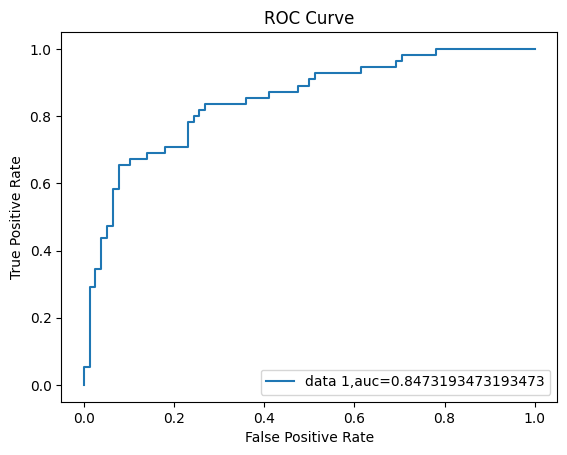

In [ ]:
#AUC score for the case is 0.79
#AUC score 1 represents a prefect classifier
#and 0.5 represent a worthless classifie
y_pred_proba = logreg.predict_proba(xTest)[::,1]
fpr,tpr,_ = metrics.roc_curve(yTest,y_pred_proba)
auc = metrics.roc_auc_score(yTest,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
#User input to predict the price
area_input = 2000
bedroom_input = 2
bathrooms_input = 2
stories_input = 2
parking_input = 2

#'1' - yes , '0' - no
mainroad_input = 1
guestroom_input = 1
basement_input = 1
hotwater_input = 1
aircondition_input = 1
prefarea_input = 1

#'-1' - unfurnished, '0' - semi-furnished, '1' - furnished
furnish_input = 1

input = [[area_input,bedroom_input,bathrooms_input,stories_input,parking_input,mainroad_input,guestroom_input,basement_input,hotwater_input,aircondition_input,prefarea_input,furnish_input]]

y_pred = logreg.predict(input)

if(y_pred[0]==1):
   print(f"Price is higher or equals to mean price (RM {mean_price:.2f})")
else:
   print(f"Price is lower to mean price (RM {mean_price:.2f})")

Price is higher or equals to mean price (RM 4600663.09)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
